The dataset is collected from Kaggle.
It has information about Shows and Movies available on Netflix in 2021.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('data/Netflix Dataset.csv')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Cleaning data
1. Duplicate
2. Data Types
3. Null Data


In [2]:
df.drop_duplicates(inplace=True)

In [3]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

Which is more popular in Netflix, Show or Movie?

In [4]:
df.fillna({'Director': 'N/A', 'Cast': 'N/A', 'Country': 'N/A', 'Rating': 'N/A'}, inplace=True)

Text(0.5, 1.0, 'Number of TV show vs Movie')

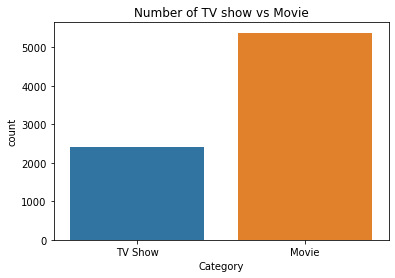

In [5]:
sns.countplot(data=df, x='Category')
plt.title('Number of TV show vs Movie')

How many movies are from US?

In [6]:
len(df[(df['Country'] == 'United States') & (df['Category'] == 'Movie')])

1850

What country produced the most contents?

Text(0.5, 1.0, 'Top 10 countries producing contents on Netflex')

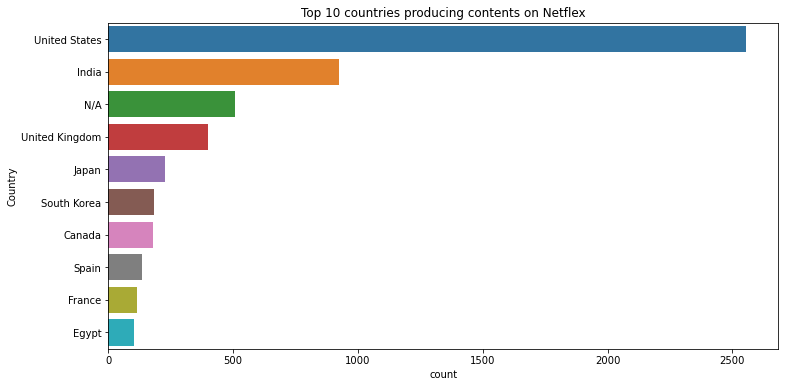

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data = df, y = 'Country', order = df['Country'].value_counts().index[0:10])
plt.title('Top 10 countries producing contents on Netflex')


What movies on Netflix Tom Cruise is in?

In [8]:
df2 = df.dropna()
df2[df2['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and..."
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...


What are the five contents that came out most recently in the US?

In [9]:
df_us = df[(df['Country'] == 'United States')]
df_us.sort_values('Release_Date', ascending=False).head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
5060,s5060,Movie,Radium Girls,"Lydia Dean Pilcher, Ginny Mohler","Joey King, Abby Quinn, Cara Seymour, Scott She...",United States,2021-01-16,TV-14,103 min,"Dramas, Independent Movies",When the women at a radium factory begin to fa...
6977,s6976,Movie,The Vanished,Peter Facinelli,"Thomas Jane, Anne Heche, Jason Patric, John D....",United States,2021-01-15,R,115 min,Thrillers,When their daughter disappears during a family...
2799,s2800,Movie,Hook,Steven Spielberg,"Dustin Hoffman, Robin Williams, Julia Roberts,...",United States,2021-01-15,PG,142 min,Children & Family Movies,"Peter Pan, now grown up and a workaholic, must..."
7571,s7570,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,2021-01-15,TV-14,32 min,Documentaries,"In this delightful short documentary, an Itali..."
1780,s1781,TV Show,Disenchantment,N/A,"Abbi Jacobson, Eric André, Nat Faxon, John DiM...",United States,2021-01-15,TV-14,3 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","Princess duties call, but she'd rather be drin..."


How are the contents on Netflix changed over years?

<AxesSubplot:title={'center':'Contents number by year'}, xlabel='year', ylabel='Title'>

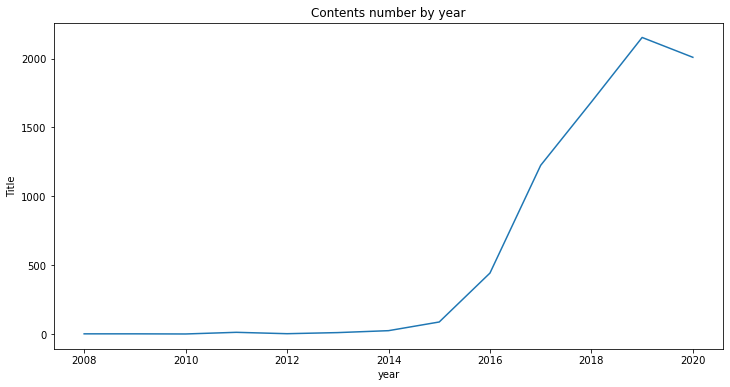

In [11]:
df['year'] = pd.DatetimeIndex(df['Release_Date']).year
df['year'] = df['year'].astype('Int64')
df_count = df.groupby('year').agg('count').reset_index()
df_count.drop(13, inplace=True)
plt.figure(figsize=(12, 6))
plt.title('Contents number by year')
sns.lineplot(data=df_count, x='year', y='Title')